In [35]:
import pandas as pd  # Import the pandas library for data manipulation
import regex as re  # Import the regex library for regular expressions
import networkx as nx # For creating and manipulating complex networks/graphs
import matplotlib.pyplot as plt # For plotting graphs

In [36]:
# Load the data from the Excel file

df = pd.read_excel('drugbank.xlsx')  # Read the data from an Excel file into a DataFrame
df # Display the DataFrame

drugbank-id                 name  \
0        DB00001            Lepirudin   
1        DB00002            Cetuximab   
2        DB00003         Dornase alfa   
3        DB00004  Denileukin diftitox   
4        DB00005           Etanercept   
...          ...                  ...   
7754     DB09023          Benactyzine   
7755     DB09024    Follitropin Alpha   
7756     DB09026            Aliskiren   
7757     DB09028             Cytisine   
7758     DB09029          Secukinumab   

                                      drug-interactions  \
0     DB01381Ginkgo bilobaAdditive anticoagulant/ant...   
1                                                   NaN   
2                                                   NaN   
3     DB06372Rilonaceptdecreases effects of toxoids ...   
4     DB01281AbataceptAvoid combination because of i...   
...                                                 ...   
7754                                                NaN   
7755                                                NaN   
7756  DB00346AlfuzosinMonitor therapy due to enhance...   
7757                                                NaN   
7758                                                NaN   

                                            description   cas-number  unii  \
0     Lepirudin is identical to natural hirudin exce...  120993-53-5   NaN   
1     Epidermal growth factor receptor binding FAB. ...  205923-56-4   NaN   
2     Dornase alfa is a biosynthetic form of human d...    9003-98-9   NaN   
3     A recombinant DNA-derived cytotoxic protein co...  173146-27-5   NaN   
4     Dimeric fusion protein consisting of the extra...  185243-69-0   NaN   
...                                                 ...          ...   ...   
7754  Benactyzine is an anticholinergic drug used as...     302-40-9   NaN   
7755  Follitropin alpha is a human follicle stimulat...   56832-30-5   NaN   
7756                                                NaN          NaN   NaN   
7757  Cytisine is an alkaloid that is found naturall...     485-35-8   NaN   
7758  A human monoclonal antibody, secukinumab (Cose...  875356-43-7   NaN   

      state                   groups  \
0       NaN                 approved   
1       NaN                 approved   
2       NaN                 approved   
3       NaN  approvedinvestigational   
4       NaN  approvedinvestigational   
...     ...                      ...   
7754    NaN                withdrawn   
7755    NaN                 approved   
7756    NaN  approvedinvestigational   
7757    NaN  approvedinvestigational   
7758    NaN                 approved   

                                     general-references  \
0     # Smythe MA, Stephens JL, Koerber JM, Mattson ...   
1                                                   NaN   
2     # Cramer GW, Bosso JA: The role of dornase alf...   
3     # Turturro F: Denileukin diftitox: a biotherap...   
4     # http://www.genome.jp/dbget-bin/www_bget?D007...   
...                                                 ...   
7754  # McLaughlin B, Rickels K, Abidi M, Toro R: Me...   
7755  #'GONAL-F® (Follitropin Alfa For Injection)'. ...   
7756                                                NaN   
7757  # Walker N, Howe C, Glover M, McRobbie H, Barn...   
7758  # McInnes IB, Sieper J, Braun J, Emery P, van ...   

                                    synthesis-reference  ... reactions  \
0                                                   NaN  ...       NaN   
1                                                   NaN  ...       NaN   
2                                                   NaN  ...       NaN   
3                                                   NaN  ...       NaN   
4     Timothy D. Osslund, Christi L. Clogston, Shon ...  ...       NaN   
...                                                 ...  ...       ...   
7754                             U.S. Patent 2,394,770.  ...       NaN   
7755       # http://www.ncbi.nlm.nih.gov/pubmed/9079412  ...       NaN   
7756      

In [37]:
df.columns # Display the columns of the DataFrame

Index(['drugbank-id', 'name', 'drug-interactions', 'description', 'cas-number',
       'unii', 'state', 'groups', 'general-references', 'synthesis-reference',
       'indication', 'pharmacodynamics', 'mechanism-of-action', 'toxicity',
       'metabolism', 'absorption', 'half-life', 'protein-binding',
       'route-of-elimination', 'volume-of-distribution', 'clearance',
       'classification', 'salts', 'synonyms', 'products',
       'international-brands', 'mixtures', 'packagers', 'manufacturers',
       'prices', 'categories', 'affected-organisms', 'dosages', 'atc-codes',
       'ahfs-codes', 'pdb-entries', 'fda-label', 'msds', 'patents',
       'food-interactions', 'drug-interactions.1', 'sequences',
       'experimental-properties', 'external-identifiers', 'external-links',
       'pathways', 'reactions', 'snp-effects', 'snp-adverse-drug-reactions',
       'targets', 'enzymes', 'carriers', 'transporters', 'average-mass',
       'monoisotopic-mass', 'calculated-properties'],
      dt

In [38]:
# Select relevant columns

df = df[['drugbank-id', 'name', 'drug-interactions']]  # Keep only the specified columns
df # Display the DataFrame

drugbank-id                 name  \
0        DB00001            Lepirudin   
1        DB00002            Cetuximab   
2        DB00003         Dornase alfa   
3        DB00004  Denileukin diftitox   
4        DB00005           Etanercept   
...          ...                  ...   
7754     DB09023          Benactyzine   
7755     DB09024    Follitropin Alpha   
7756     DB09026            Aliskiren   
7757     DB09028             Cytisine   
7758     DB09029          Secukinumab   

                                      drug-interactions  
0     DB01381Ginkgo bilobaAdditive anticoagulant/ant...  
1                                                   NaN  
2                                                   NaN  
3     DB06372Rilonaceptdecreases effects of toxoids ...  
4     DB01281AbataceptAvoid combination because of i...  
...                                                 ...  
7754                                                NaN  
7755                                                NaN  
7756  DB00346AlfuzosinMonitor therapy due to enhance...  
7757                                                NaN  
7758                                                NaN  

[7759 rows x 3 columns]

In [39]:
# Extract DrugBank IDs from drug-interactions column

df['drug-interactions'] = df['drug-interactions'].apply(lambda x: ','.join(re.findall(r'(DB\d{5})', str(x))))  
# Extract DrugBank IDs from the 'drug-interactions' column using a regular expression

df # Display the DataFrame

C:\Users\egypt\AppData\Local\Temp\ipykernel_7940\2151064581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drug-interactions'] = df['drug-interactions'].apply(lambda x: ','.join(re.findall(r'(DB\d{5})', str(x))))  # Extract DrugBank IDs from the 'drug-interactions' column using a regular expression


drugbank-id                 name  \
0        DB00001            Lepirudin   
1        DB00002            Cetuximab   
2        DB00003         Dornase alfa   
3        DB00004  Denileukin diftitox   
4        DB00005           Etanercept   
...          ...                  ...   
7754     DB09023          Benactyzine   
7755     DB09024    Follitropin Alpha   
7756     DB09026            Aliskiren   
7757     DB09028             Cytisine   
7758     DB09029          Secukinumab   

                                      drug-interactions  
0                                       DB01381,DB00374  
1                                                        
2                                                        
3                                       DB06372,DB00072  
4     DB01281,DB00026,DB08879,DB08879,DB06168,DB0890...  
...                                                 ...  
7754                                                     
7755                                                     
7756  DB00346,DB01143,DB01076,DB00484,DB08907,DB0009...  
7757                                                     
7758                                                     

[7759 rows x 3 columns]

In [40]:
# Example drug names for user input

# Treprostinil
# Lepirudin
# Sucralfate
# Cetuximab
# Dornase alfa
# Benactyzine
# Aliskiren

In [64]:
# Ask user for drug names

user_drugs = []  # Create an empty list to store user-entered drug names
while True:  # Begin an infinite loop
    drug_name = input("Enter a drug name (or 'done' to finish): ")  # Prompt the user to enter a drug name
    if drug_name.lower() == 'done':  # Check if the user wants to finish entering drugs
        break  # Exit the loop if 'done' is entered
    else:  # If the user enters a drug name
        user_drugs.append(drug_name)  # Add the drug name to the list of user-entered drugs


user_drugs

['Treprostinil',
 'Lepirudin',
 'Sucralfate',
 'Cetuximab',
 'Dornase alfa',
 'Benactyzine',
 'Aliskiren']

In [65]:
# Find DrugBank IDs for user-entered drugs

user_drug_ids = []  # Create an empty list to store DrugBank IDs corresponding to user-entered drugs
for drug_name in user_drugs:  # Iterate over each user-entered drug name
    drug_id = df.loc[df['name'].str.lower() == drug_name.lower(), 'drugbank-id'].values  # Find the DrugBank ID for the drug name
    if len(drug_id) > 0:  # If a DrugBank ID is found for the drug name
        user_drug_ids.append((drug_id[0], drug_name))  # Add the DrugBank ID and drug name to the list of user-entered DrugBank IDs
    else:  # If no DrugBank ID is found for the drug name
        print(f"Drug '{drug_name}' not found in the dataset.")  # Print a message indicating that the drug name was not found in the dataset

user_drug_ids

[('DB00374', 'Treprostinil'),
 ('DB00001', 'Lepirudin'),
 ('DB00364', 'Sucralfate'),
 ('DB00002', 'Cetuximab'),
 ('DB00003', 'Dornase alfa'),
 ('DB09023', 'Benactyzine'),
 ('DB09026', 'Aliskiren')]

In [43]:
# Create a graph

G = nx.Graph() # Create an empty graph

In [62]:
# Add all user-entered drugs to the graph as nodes

for drug_id, drug_name in user_drug_ids:  # Iterate over each user-entered DrugBank ID and drug name
    G.add_node(drug_name) # Add the drug name as a node to the graph

In [44]:
# Check for interactions between user-entered drugs

for i, (drug_id1, drug_name1) in enumerate(user_drug_ids): # Iterate over each user-entered DrugBank ID and drug name
    for drug_id2, drug_name2 in user_drug_ids[i+1:]: # Iterate over the remaining DrugBank IDs and drug names
        interactions = df.loc[df['drugbank-id'] == drug_id1, 'drug-interactions'].values # Get the interactions for the current drug ID
        if len(interactions) > 0: # If interactions are found
            interactions = interactions[0].split(',') # Split the interactions into a list
            if drug_id2 in interactions: # Check if the current drug ID is in the interactions list
                print(f"Interaction between {drug_name1} and {drug_name2}.") # Print a message indicating the interaction
                # Add edge to the graph
                G.add_edge(drug_name1, drug_name2) # Add an edge between the interacting drugs
print("Finished checking interactions.") # Print a message indicating the completion of interaction checking


Interaction between Treprostinil and Lepirudin.
Finished checking interactions.


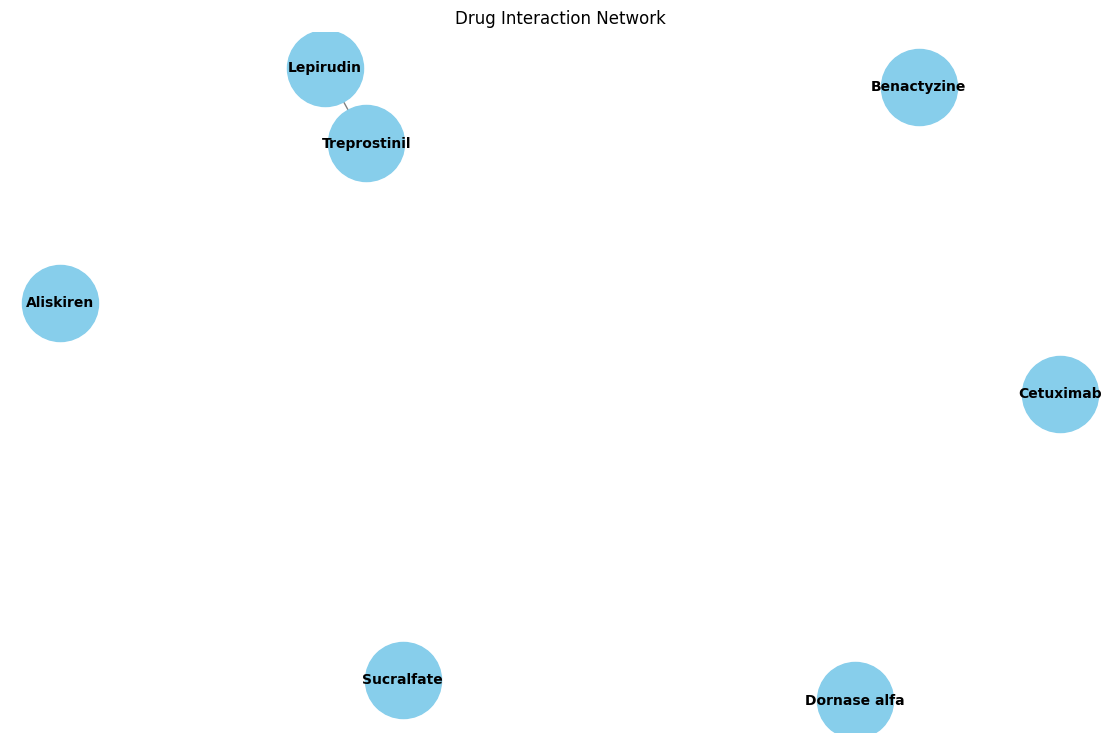

In [60]:
# Plot the drug interaction network

plt.figure(figsize=(11, 7)) # Set the figure size
pos = nx.spring_layout(G) # Define the layout for the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray") # Draw the graph
plt.title("Drug Interaction Network") # Set the title of the plot
plt.show() # Display the plot